In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt 




In [27]:
data = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/01_Static_Data/static_P50_data_training_.csv")
data = data.loc[:, 'Effective_Length':'Rich_Oil_Saturation']
data

,Effective_Length,Spacing,Rich_Pay_Thickness,Non_Rich_Pay_Thickness,BottomWater_Thickness,Stand_Off,Rich_Vertical_Permeability,Non_Rich_Vertical_Permeability,Rich_Porosity,Non_Rich_Porosity,BottomWater_Porosity,Rich_Oil_Saturation
0,760.074280,106.30480,32.510980,5.145955,1.533611,11.143210,4.144203,330.80680,0.328365,0.291056,0.160469,0.828425
1,761.119385,101.34860,30.312370,6.935481,1.824182,11.029680,4.385550,384.33420,0.328382,0.304383,0.153055,0.836330
2,760.619385,100.53500,30.645230,7.189929,2.584571,10.498440,4.585326,274.49840,0.327800,0.297508,0.113396,0.849147
3,762.490418,98.85076,32.267250,7.519586,3.187606,12.804760,4.802915,139.70160,0.325021,0.300185,0.119104,0.862374
4,762.535889,95.62300,30.842650,9.481523,2.796190,12.029400,4.875835,71.60357,0.321549,0.303089,0.146892,0.868012
...,...,...,...,...,...,...,...,...,...,...,...,...
147,942.790772,100.00000,22.947810,5.256038,0.582197,4.051172,4.398499,96.22758,0.350244,0.294220,0.303442,0.888942
148,921.700012,100.00000,20.838290,5.471814,0.577674,3.508812,4.429205,80.34807,0.352847,0.297995,0.285328,0.888625
149,939.299988,100.00000,18.023940,5.441135,0.587263,2.722717,4.504072,75.38312,0.353783,0.292732,0.267502,0.882435
150,869.713379,100.00000,14.512410,5.225158,0.939392,2.041551,4.498607,86.26454,0.352888,0.279199,0.255218,0.864081


In [28]:
std_data = data - data.mean(axis=0)
std_data

,Effective_Length,Spacing,Rich_Pay_Thickness,Non_Rich_Pay_Thickness,BottomWater_Thickness,Stand_Off,Rich_Vertical_Permeability,Non_Rich_Vertical_Permeability,Rich_Porosity,Non_Rich_Porosity,BottomWater_Porosity,Rich_Oil_Saturation
0,-58.411645,19.158492,10.309342,-3.634116,-0.735306,8.348662,0.176353,189.746672,-0.006661,0.006455,-0.058633,-0.019697
1,-57.366540,14.202292,8.110732,-1.844590,-0.444735,8.235132,0.417700,243.274072,-0.006644,0.019782,-0.066047,-0.011792
2,-57.866540,13.388692,8.443592,-1.590142,0.315654,7.703892,0.617476,133.438272,-0.007226,0.012907,-0.105706,0.001025
3,-55.995507,11.704452,10.065612,-1.260485,0.918689,10.010212,0.835065,-1.358528,-0.010005,0.015584,-0.099998,0.014253
4,-55.950036,8.476692,8.641012,0.701452,0.527273,9.234852,0.907985,-69.456558,-0.013478,0.018488,-0.072210,0.019891
...,...,...,...,...,...,...,...,...,...,...,...,...
147,124.304847,12.853692,0.746172,-3.524033,-1.686721,1.256624,0.430649,-44.832548,0.015218,0.009619,0.084340,0.040821
148,103.214087,12.853692,-1.363348,-3.308257,-1.691243,0.714264,0.461355,-60.712058,0.017821,0.013394,0.066227,0.040504
149,120.814063,12.853692,-4.177698,-3.338936,-1.681654,-0.071831,0.536222,-65.677008,0.018757,0.008131,0.048400,0.034314
150,51.227454,12.853692,-7.689228,-3.554913,-1.329526,-0.752997,0.530757,-54.795588,0.017862,-0.005402,0.036116,0.015960


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(std_data)
Z_pca_data = pca.transform(std_data)
X_pca_data = pca.inverse_transform(Z_pca_data)
# plt.figure(figsize=(10,8))
# plt.scatter(std_data[:,0],std_data[:,1])
# plt.scatter(X_pca_data[:,0],X_pca_data[:,1])
# plt.show()

In [30]:
variance_explained_percent = pca.explained_variance_ratio_ * 100 
print(variance_explained_percent)

[5.24034993e+01 4.64707877e+01 8.68788416e-01 1.98262459e-01
 4.07721153e-02 1.31679970e-02 3.97125081e-03 7.38354679e-04
 8.97688475e-06 1.92949240e-06 1.29224050e-06 1.56552389e-07]


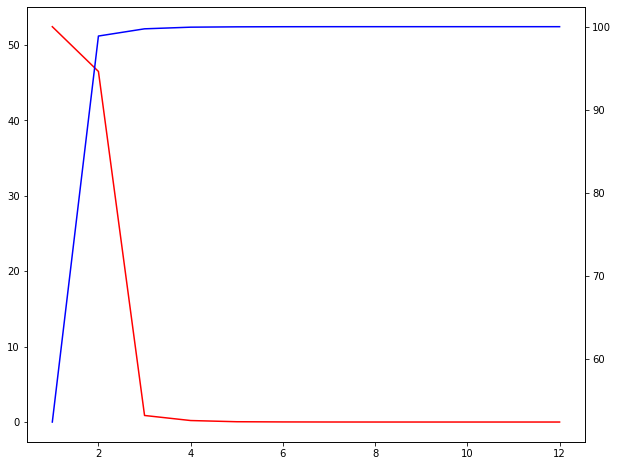

In [31]:
total_variance_exp = 0
total_variance_exp_vector = []
cluster = np.arange(len(variance_explained_percent)) + 1
for i in range(0, len(cluster)):
    total_variance_exp += variance_explained_percent[i]
    total_variance_exp_vector.append(total_variance_exp)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(cluster,variance_explained_percent, 'r')
ax2 = ax.twinx()
ax2.plot(cluster,total_variance_exp_vector, 'b')
plt.show()